### Task1: Data exploration

In [1]:
# a) required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# load dataset
diab = pd.read_csv('DS1_C9_S5_Practice_Diabetes_Data.csv')
diab

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [7]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [9]:
diab.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# b) structure of data
print('shape:',diab.shape)
diab.describe()

shape: (768, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


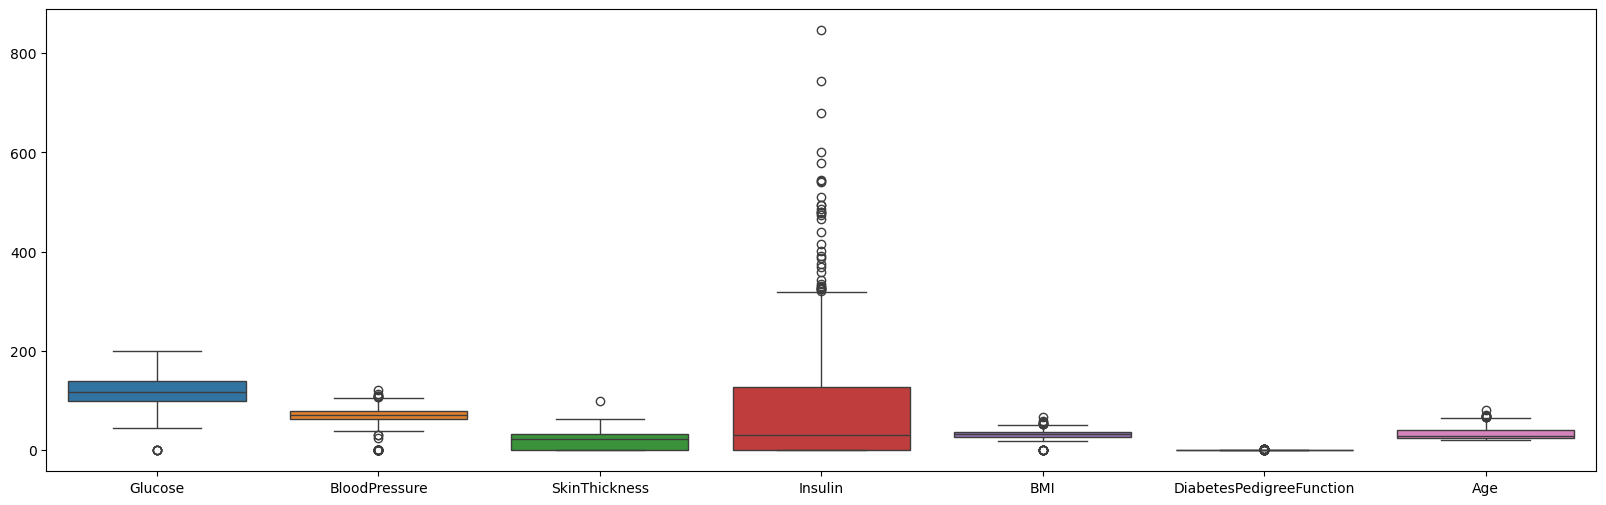

In [13]:
sns.boxplot(diab.loc[:,diab.columns!='Outcome'])
plt.gcf().set_size_inches(20,6)
plt.show()

In [9]:
def wincori(df):
    for col in df.columns:
        ser=pd.Series(df[col])
        q1=ser.quantile(0.25)
        q3=ser.quantile(0.75)
        iqr=q3-q1
        uf=q3+1.5*iqr
        lf=q1-1.5*iqr
        for z in ser:
            df.loc[df[col]>uf,col]=uf
            df.loc[df[col]<lf,col]=lf
    return df

In [11]:
diab1=wincori(diab.loc[:,diab.columns!='Outcome'])
diab1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72,35,0.0,33.6,0.627,50.0
1,85.0,66,29,0.0,26.6,0.351,31.0
2,183.0,64,0,0.0,23.3,0.672,32.0
3,89.0,66,23,94.0,28.1,0.167,21.0
4,137.0,40,35,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...
763,101.0,76,48,180.0,32.9,0.171,63.0
764,122.0,70,27,0.0,36.8,0.340,27.0
765,121.0,72,23,112.0,26.2,0.245,30.0
766,126.0,60,0,0.0,30.1,0.349,47.0


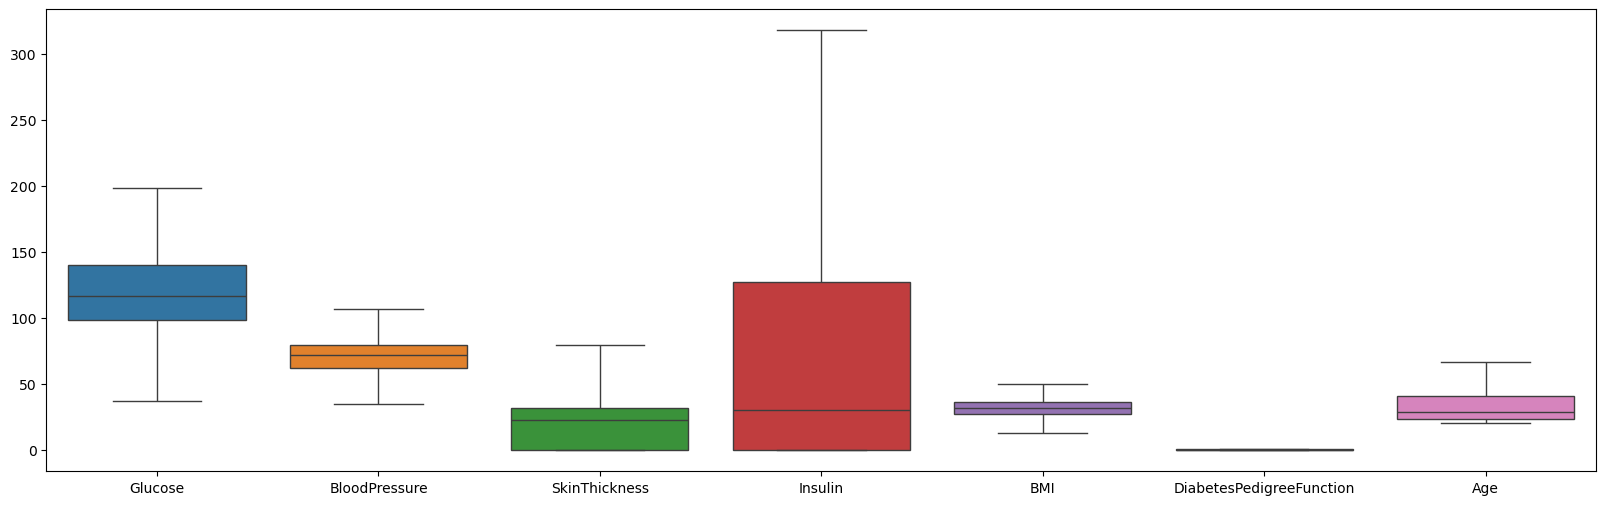

In [13]:
sns.boxplot(diab1)
plt.gcf().set_size_inches(20,6)
plt.show()

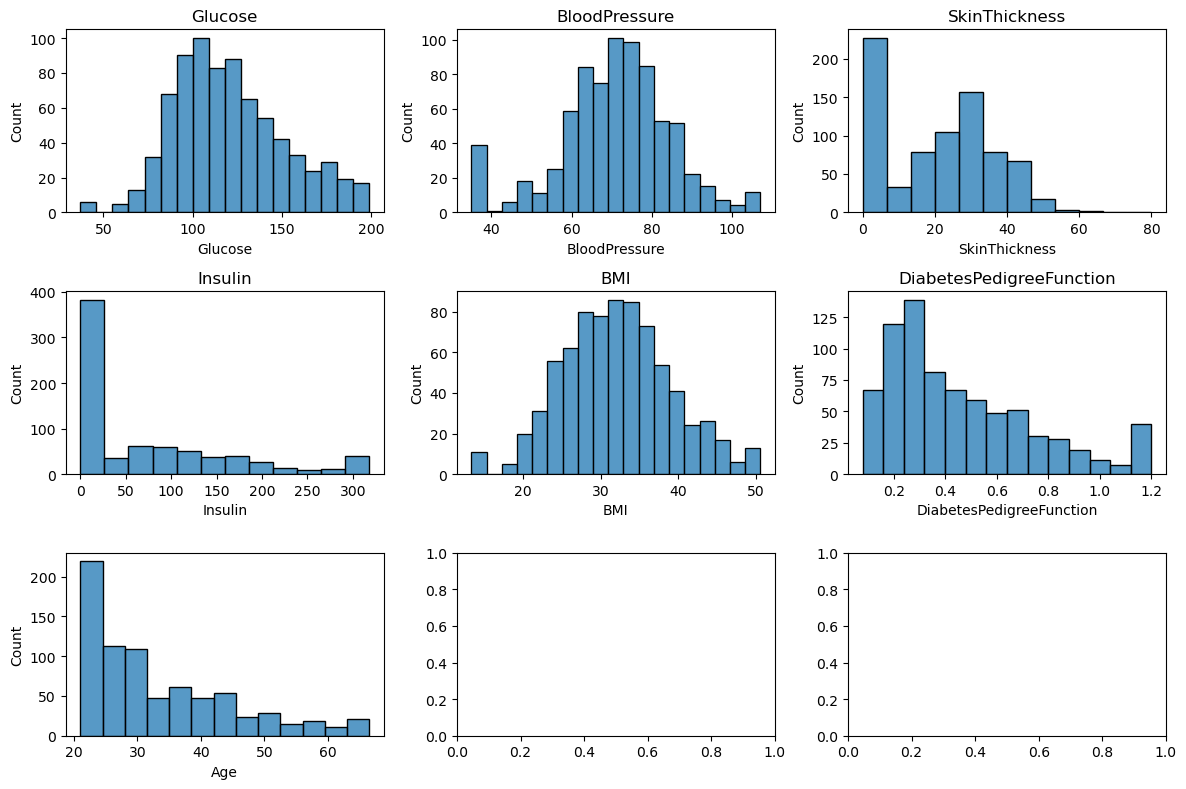

In [25]:
# c) Distribution of independent variables
diabts=diab1.iloc[:,:6]
cols=diabts.columns
k=0
fig,ax=plt.subplots(3,3,tight_layout=True,figsize=(12,8))
for i in range(0,2):
    for j in range(0,3):
        sns.histplot(data=diabts,x=cols[k],ax=ax[i,j])
        ax[i,j].set_title(cols[k])
        k=k+1
sns.histplot(data=diab1,x='Age',ax=ax[2,0])
plt.show()

### Task2: Data preprocessing

In [15]:
# a) data scaling
cols=diab1.columns
scale=StandardScaler()
df_scale=scale.fit_transform(diab1)
df_scaled=pd.DataFrame(df_scale,columns=cols)
df_scaled

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252
3,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828
4,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199
...,...,...,...,...,...,...,...
763,-0.646072,0.374620,1.735982,1.137221,0.109998,-1.008772,2.564372
764,0.027714,-0.048273,0.409758,-0.787602,0.663583,-0.416642,-0.533513
765,-0.004371,0.092691,0.157144,0.410066,-0.841032,-0.749497,-0.275356
766,0.156054,-0.753094,-1.295388,-0.787602,-0.287447,-0.385109,1.187534


In [17]:
# b) splitting the data
X=df_scaled
y=diab['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Task3: Model Building

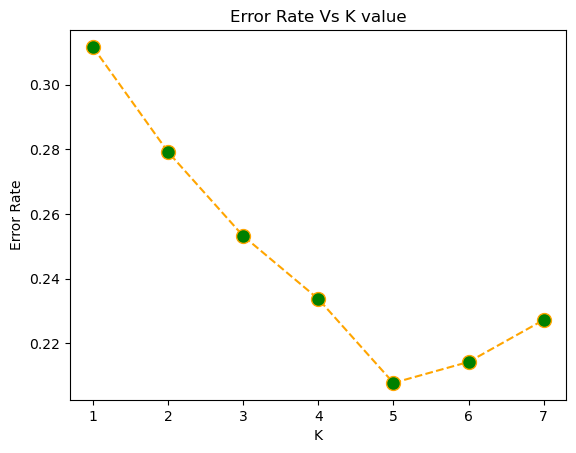

In [19]:
# a) Find optimum k value
error_rate=[]
for i in range(1,8):
    cls_diab=neighbors.KNeighborsClassifier(n_neighbors=i)
    cls_diab.fit(X_train,y_train)
    y_pred=cls_diab.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

plt.plot(range(1,8),error_rate,color='orange',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.title("Error Rate Vs K value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

In [21]:
k=5
print('optimum k value:',k)

optimum k value: 5


In [23]:
# b) building the model
cls=neighbors.KNeighborsClassifier(k)
cls.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
# c) properties of model
print('various answers:',cls.classes_)
print('neighbors considered:',cls.n_neighbors)

various answers: [0 1]
neighbors considered: 5


### Task4: Evaluate Model performance

In [27]:
# a) predict the test data
y_pred=cls.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [29]:
# b) evalaution metrics
print('Accuracy score:',accuracy_score(y_pred,y_test))
print('precision score:',precision_score(y_pred,y_test,average='micro'))
print('recall score:',recall_score(y_pred,y_test,average='micro'))
print('f1 score:',f1_score(y_pred,y_test,average='micro'))

Accuracy score: 0.7922077922077922
precision score: 0.7922077922077922
recall score: 0.7922077922077922
f1 score: 0.7922077922077922


In [31]:
print('Roc score:',roc_auc_score(y_pred,y_test,average='macro'))

Roc score: 0.7561282212445002


In [71]:
y_pred_prob=cls.predict_proba(X_test)[:,1]
roc=roc_auc_score(y_test,y_pred_prob,multi_class='ovr',average='macro')
print('Roc Auc score:',roc)

Roc Auc score: 0.8067210180950488
